In [1]:
using MCTSExperiments
using DecisionMakingProblems
using MCTS
using Statistics
using Plots
using LaTeXStrings
using BenchmarkTools

┌ Info: Precompiling MCTSExperiments [dac6b303-fdac-48c1-9f18-7af9a7634e9d]
└ @ Base loading.jl:1317


In [4]:
using DecisionMakingProblems: isdone

In [2]:
twenty_forty_eight = DecisionMakingProblems.TwentyFortyEight(γ=0.99)

mdp = DecisionMakingProblems.MDP(twenty_forty_eight);

In [3]:
π_rand(s) = rand(DecisionMakingProblems.DIRECTIONS)

π_rand (generic function with 1 method)

In [6]:
rollouts_random = [ MCTSExperiments.rollout(mdp, DecisionMakingProblems.initial_board(), π_rand, 10000, isdone) for i in 1:100 ]

print("$(mean(rollouts_random)) ± $(std(rollouts_random))")

518.1343909542858 ± 155.4039954056364

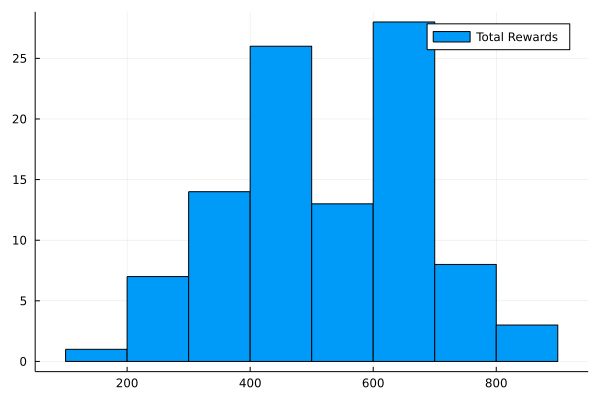

In [7]:
histogram(rollouts_random, label="Total Rewards")

In [8]:
mcts_problem = MCTSExperiments.MonteCarloTreeSearch(
    mdp, # 𝒫
    Dict{Tuple{UInt64, UInt8}, Float64}(), # Q
    Dict{Tuple{UInt64, UInt8}, Float64}(), # N
    10, # d
    100, # m
    5.0, # c
    s -> 0 # U
)

board = DecisionMakingProblems.initial_board()

@benchmark MCTSExperiments.rollout(mdp, board, mcts_problem, 10000, isdone)

BenchmarkTools.Trial: 12 samples with 1 evaluation.
 Range (min … max):  254.372 ms … 631.285 ms  ┊ GC (min … max): 6.88% …  3.55%
 Time  (median):     432.598 ms               ┊ GC (median):    4.08%
 Time  (mean ± σ):   424.940 ms ± 125.674 ms  ┊ GC (mean ± σ):  7.90% ± 11.17%

  ██   █         █   █      █   █ ██                 █ █      █  
  ██▁▁▁█▁▁▁▁▁▁▁▁▁█▁▁▁█▁▁▁▁▁▁█▁▁▁█▁██▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█▁█▁▁▁▁▁▁█ ▁
  254 ms           Histogram: frequency by time          631 ms <

 Memory estimate: 79.02 MiB, allocs estimate: 3287687.

In [9]:
mcts_problem = MCTSExperiments.MonteCarloTreeSearch(
    mdp, # 𝒫
    Dict{Tuple{UInt64, UInt8}, Float64}(), # Q
    Dict{Tuple{UInt64, UInt8}, Float64}(), # N
    10, # d
    100, # m
    5.0, # c
    s -> 0 # U
)

rollouts_mcts_U0 = [ MCTSExperiments.rollout(mdp, DecisionMakingProblems.initial_board(), mcts_problem, 10000, isdone) for i in 1:100 ]

print("$(mean(rollouts_mcts_U0)) ± $(std(rollouts_mcts_U0))")

1311.0933397868423 ± 92.86500700915984

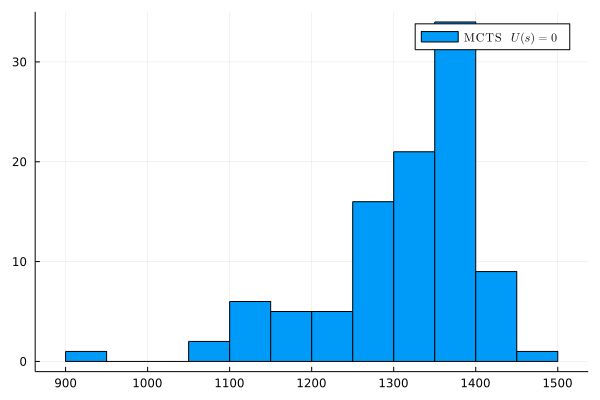

In [10]:
histogram(rollouts_mcts_U0, label=L"\mathrm{MCTS} \quad U(s) = 0")

In [19]:
init = DecisionMakingProblems.initial_board()

0x0000000000100020

In [17]:
@benchmark MCTSExperiments.rollout(mdp, DecisionMakingProblems.initial_board(), mcts_problem, 10000, isdone)

BenchmarkTools.Trial: 7 samples with 1 evaluation.
 Range (min … max):  525.038 ms … 27.905 s  ┊ GC (min … max): 0.00% … 7.78%
 Time  (median):     818.241 ms             ┊ GC (median):    3.28%
 Time  (mean ± σ):      4.673 s ± 10.246 s  ┊ GC (mean ± σ):  7.33% ± 4.47%

  █▁                                                           
  ██▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▆ ▁
  525 ms          Histogram: frequency by time         27.9 s <

 Memory estimate: 156.24 MiB, allocs estimate: 6523877.

In [18]:
mcts_problem = MCTSExperiments.MonteCarloTreeSearch(
    mdp, # 𝒫
    Dict{Tuple{UInt64, UInt8}, Float64}(), # Q
    Dict{Tuple{UInt64, UInt8}, Float64}(), # N
    10, # d
    100, # m
    5.0, # c
    s -> MCTSExperiments.rollout(mdp, s, π_rand, 100) # U
)

MonteCarloTreeSearch(MDP(0.99, nothing, (0x00, 0x01, 0x02, 0x03), nothing, DecisionMakingProblems.var"#27#29"{DecisionMakingProblems.TwentyFortyEight}(DecisionMakingProblems.TwentyFortyEight
  γ: Float64 0.99
), DecisionMakingProblems.var"#28#30"{DecisionMakingProblems.TwentyFortyEight}(DecisionMakingProblems.TwentyFortyEight
  γ: Float64 0.99
)), Dict{Tuple{UInt64, UInt8}, Float64}(), Dict{Tuple{UInt64, UInt8}, Float64}(), 10, 100, 5.0, var"#17#18"())

In [11]:
for i in 1:100
    mcts_problem = MCTSExperiments.MonteCarloTreeSearch(
        mdp, # 𝒫
        Dict{Tuple{UInt64, UInt8}, Float64}(), # Q
        Dict{Tuple{UInt64, UInt8}, Float64}(), # N
        10, # d
        100, # m
        5.0, # c
        s -> MCTSExperiments.rollout(mdp, s, π_rand, 100) # U
    )
end
rollouts_mcts_U = [ MCTSExperiments.rollout(mdp, DecisionMakingProblems.initial_board(), mcts_problem, 10000, isdone) for i in 1:100 ]

print("$(mean(rollouts_mcts_U)) ± $(std(rollouts_mcts_U))")

LoadError: InterruptException:

In [12]:
histogram(rollouts_mcts_U, label=L"\mathrm{MCTS} \quad U(s) = \mathbb{E}\,[R\,|\,\pi_{rand}]")

LoadError: UndefVarError: rollouts_mcts_U not defined

In [13]:
mcts_problem = MCTSExperiments.MonteCarloTreeSearch(
    mdp, # 𝒫
    Dict{Tuple{UInt64, UInt8}, Float64}(), # Q
    Dict{Tuple{UInt64, UInt8}, Float64}(), # N
    10, # d
    100, # m
    5.0, # c
    s -> 0 # U
)

DecisionMakingProblems.play_game(s -> mcts_problem(s))

Move #1, current score=0.0
     4     0     0     0
     0     2     0     0
     0     0     0     0
     0     0     0     0

	a = RIGHT
Move #2, current score=0.0
     0     0     0     4
     0     0     0     2
     0     0     0     0
     2     0     0     0

	a = DOWN
Move #3, current score=0.0
     0     0     0     2
     0     0     0     0
     0     0     0     4
     2     0     0     2

	a = RIGHT
Move #4, current score=4.0
     0     0     2     2
     0     0     0     0
     0     0     0     4
     0     0     0     4

	a = UP
Move #5, current score=12.0
     0     0     2     2
     0     0     0     8
     0     0     0     0
     0     0     2     0

	a = LEFT
Move #6, current score=16.0
     4     0     0     0
     8     0     0     0
     0     0     2     0
     2     0     0     0

	a = RIGHT
Move #7, current score=16.0
     0     0     0     4
     0     0     4     8
     0     0     0     2
     0     0     0     2

	a = DOWN
Move #8, current score=20.0
  

    16     4     4    32
     0   128     0     2
     0     0     0     2

	a = RIGHT
Move #91, current score=960.0
     2     4    16     8
     0    16     8    32
     0     0   128     2
     0     0     0     2

	a = UP
Move #92, current score=964.0
     2     4    16     8
     0    16     8    32
     0     0   128     4
     0     0     2     0

	a = DOWN
Move #93, current score=964.0
     0     0    16     0
     0     0     8     8
     4     4   128    32
     2    16     2     4

	a = RIGHT
Move #94, current score=988.0
     0     0     0    16
     0     2     0    16
     0     8   128    32
     2    16     2     4

	a = UP
Move #95, current score=1020.0
     2     2   128    32
     0     8     2    32
     0    16     2     4
     0     0     0     0

	a = UP
Move #96, current score=1088.0
     2     2   128    64
     0     8     4     4
     0    16     2     0
     0     0     0     0

	a = LEFT
Move #97, current score=1100.0
     4   128    64     0
     8     8  

     4    64     2     0
     8   256    16     0
     2    32     8     2

	a = UP
Move #167, current score=2208.0
     8    64     2     2
     8   256    16     0
     2    32     8     0
     0     4     0     0

	a = UP
Move #168, current score=2224.0
    16    64     2     2
     2   256    16     0
     0    32     8     2
     0     4     0     0

	a = DOWN
Move #169, current score=2228.0
     0    64     0     0
     0   256     2     0
    16    32    16     2
     2     4     8     4

	a = UP
Move #170, current score=2228.0
    16    64     2     2
     2   256    16     4
     0    32     8     4
     0     4     0     0

	a = DOWN
Move #171, current score=2236.0
     0    64     0     2
     0   256     2     0
    16    32    16     2
     2     4     8     8

	a = RIGHT
Move #172, current score=2252.0
     0     0    64     2
     0     0   256     2
    16    32    16     2
     4     2     4    16

	a = UP
Move #173, current score=2256.0
    16    32    64     4
     4

	a = UP
Move #245, current score=4120.0
     4     8     2    16
     2     0    32   512
     0     0     2     8
     0     0     0     0

	a = RIGHT
Move #246, current score=4120.0
     4     8     2    16
     0     2    32   512
     0     0     2     8
     2     0     0     0

	a = UP
Move #247, current score=4120.0
     4     8     2    16
     2     2    32   512
     0     0     2     8
     2     0     0     0

	a = DOWN
Move #248, current score=4124.0
     4     0     0     0
     0     0     2    16
     4     8    32   512
     4     2     2     8

	a = UP
Move #249, current score=4132.0
     8     8     2    16
     4     2    32   512
     0     0     2     8
     2     0     0     0

	a = LEFT
Move #250, current score=4148.0
    16     2    16     2
     4     2    32   512
     2     8     0     0
     2     0     0     0

	a = DOWN
Move #251, current score=4156.0
     0     0     0     0
    16     0     4     0
     4     4    16     2
     4     8    32   512

	a =

	a = LEFT
Move #319, current score=5036.0
     4     0     0     0
     4    32     0     2
    32   128    32   512
     2     8     4     0

	a = UP
Move #320, current score=5044.0
     8    32    32     2
    32   128     4   512
     2     8     0     0
     0     4     0     0

	a = RIGHT
Move #321, current score=5108.0
     0     8    64     2
    32   128     4   512
     0     2     2     8
     0     0     0     4

	a = RIGHT
Move #322, current score=5112.0
     0     8    64     2
    32   128     4   512
     0     0     4     8
     2     0     0     4

	a = UP
Move #323, current score=5120.0
    32     8    64     2
     2   128     8   512
     0     0     2     8
     0     0     0     4

	a = DOWN
Move #324, current score=5120.0
     0     0     4     2
     0     0    64   512
    32     8     8     8
     2   128     2     4

	a = RIGHT
Move #325, current score=5136.0
     0     2     4     2
     0     0    64   512
     0    32     8    16
     2   128     2     4



	a = DOWN
Move #404, current score=6480.0
     0     4     0     0
     0   128     8     4
     2     8   512    16
     2     2   256     8

	a = UP
Move #405, current score=6484.0
     4     4     8     4
     0   128   512    16
     0     8   256     8
     2     2     0     0

	a = LEFT
Move #406, current score=6496.0
     8     8     4     0
   128   512    16     0
     8   256     8     0
     4     2     0     0

	a = LEFT
Move #407, current score=6512.0
    16     4     0     2
   128   512    16     0
     8   256     8     0
     4     2     0     0

	a = UP
Move #408, current score=6512.0
    16     4    16     2
   128   512     8     0
     8   256     0     0
     4     2     0     4

	a = LEFT
Move #409, current score=6512.0
    16     4    16     2
   128   512     8     0
     8   256     2     0
     4     2     4     0

	a = DOWN
Move #410, current score=6512.0
    16     4    16     2
   128   512     8     0
     8   256     2     0
     4     2     4     2

	a 

	a = LEFT
Move #472, current score=7600.0
   256     8   256     2
     4    16    32    16
     4   512     8     2
     2     0     0     0

	a = UP
Move #473, current score=7608.0
   256     8   256     2
     8    16    32    16
     2   512     8     2
     0     0     0     2

	a = LEFT
Move #474, current score=7608.0
   256     8   256     2
     8    16    32    16
     2   512     8     2
     2     0     2     0

	a = UP
Move #475, current score=7612.0
   256     8   256     2
     8    16    32    16
     4   512     8     2
     2     0     2     0

	a = LEFT
Move #476, current score=7616.0
   256     8   256     2
     8    16    32    16
     4   512     8     2
     4     0     4     0

	a = DOWN
Move #477, current score=7624.0
     0     2   256     0
   256     8    32     2
     8    16     8    16
     8   512     4     2

	a = DOWN
Move #478, current score=7640.0
     0     2   256     2
     0     8    32     2
   256    16     8    16
    16   512     4     2

	a 